# **Bit Plane Slicing**

8 bitten oluşan bir görüntüde piksel değerleri 0-255 arasında değişmektedir.

Bu değerleri yazmak yerine aynı zamanda bu değerlerin bit temsilleri de kullanılabilir.

Yüksek bit düzlemleri fotoğrafın içindeki bilgiyi en çok temsil eden bit düzlemleridir.

Bit düzlemi sayısı azaldıkça görüntüdeki gürültü artmaktadır.

Bu şekilde daha az öneme sahip bit düzlemlerinden kurtularak görüntüler sıkıştırılabilir ve çok fazla bilgi kaybı da yaşanmamış olur.

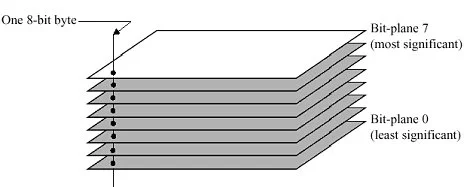

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def horizontal_stack(*args):
    return np.hstack(args)

In [ ]:
def rescale_to_8bits(img):
    s = img.astype(float)
    s = (((s - np.min(s)) / (np.max(s))) * 255).astype(np.uint8)
    return s

In [ ]:
def bit_plane_slicing(img, bit_plane):
    bit_plane_image = np.full_like(img, 2 ** bit_plane)
    bit_plane_sliced_image = np.bitwise_and(img, bit_plane_image)
    return bit_plane_sliced_image

In [ ]:
def image_compressor(img, bit_planes):
    compressed_image = np.zeros_like(img)

    for bit_plane in bit_planes:
        compressed_image = compressed_image + bit_plane_slicing(img, bit_plane)

    return compressed_image

In [ ]:
image_fractal_iris = cv2.imread(r"C:\Users\ilhan\Desktop\fractal-iris.tif", 0)

In [ ]:
bit_planes = []
for bit_plane in range(8):
    bit_foto = bit_plane_slicing(image_headct_vandy, bit_plane)
    print("Bit plane: ", bit_plane+1, "unique values: ", np.unique(bit_foto))
    bit_foto = rescale_to_8bits(bit_foto)
    bit_planes.append(bit_foto)

bit_planes = bit_planes[::-1]

Bit plane:  1 unique values:  [0 1]
Bit plane:  2 unique values:  [0 2]
Bit plane:  3 unique values:  [0 4]
Bit plane:  4 unique values:  [0 8]
Bit plane:  5 unique values:  [ 0 16]
Bit plane:  6 unique values:  [ 0 32]
Bit plane:  7 unique values:  [ 0 64]
Bit plane:  8 unique values:  [  0 128]


In [ ]:
row1 = horizontal_stack(image_headct_vandy, bit_planes[0], bit_planes[1])
row2 = horizontal_stack(bit_planes[2], bit_planes[3], bit_planes[4])
row3 = horizontal_stack(bit_planes[5], bit_planes[6], bit_planes[7])

In [ ]:
grid = np.vstack((row1, row2, row3))

In [ ]:
compressed_image1 = image_compressor(image_headct_vandy, [7, 6])
compressed_image2 = image_compressor(image_headct_vandy, [7, 6, 5])
compressed_image3 = image_compressor(image_headct_vandy, [7, 6, 5, 4])
compressed_image4 = image_compressor(image_headct_vandy, [7, 6, 5, 4, 3])
compressed_image5 = image_compressor(image_headct_vandy, [7, 6, 5, 4, 3, 2])
compressed_image6 = image_compressor(image_headct_vandy, [7, 6, 5, 4, 3, 2, 1, 0])

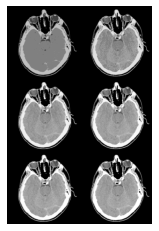

In [ ]:
row1 = horizontal_stack(compressed_image1, compressed_image2)
row2 = horizontal_stack(compressed_image3, compressed_image4)
row3 = horizontal_stack(compressed_image5, compressed_image6)
 
grid = np.vstack((row1, row2, row3))

plt.imshow(grid, cmap="gray")
plt.axis("off")
plt.show()